# SHIVAM, M22AI632

## PROBLEM 3 - Chart Image Classification using CNN

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D, Dropout
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:

train_val_dir = "C:\\Users\\shiva\\Downloads\\charts\\charts\\train_val"
validation_dir = "C:\\Users\\shiva\\Downloads\\charts\\charts\\train_val"
test_dir = "C:\\Users\\shiva\\Downloads\\charts\\charts\\test"
train_path_labels = "C:\\Users\\shiva\\Downloads\\charts\\charts\\train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [3]:


images = []
labels = []

for filename in os.listdir(train_val_dir): 
    if filename.endswith('.png'):
        
        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img_array = np.array(img)
       
        images.append(img_array)
        labels.append(filename)
        

le = LabelEncoder()
labels = le.fit_transform(labels)
        

images = np.array(images) 
labels = np.array(labels)

np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')                  
y_train = np.load('y_train.npy')

In [4]:
x_train.shape

(1000, 128, 128, 3)

In [5]:
x_train[:5]
y_train[:5]

array([0, 1, 2, 3, 4], dtype=int64)

In [6]:


images = []
labels = []

for filename in os.listdir(test_dir): 
    if filename.endswith('.png'): 
        
        img = cv2.imread(os.path.join(test_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img_array = np.array(img)
       
        images.append(img_array)
        labels.append(filename)


le = LabelEncoder()
labels = le.fit_transform(labels)
        

images = np.array(images) 
labels = np.array(labels)


np.save('x_test.npy', images)
np.save('y_test.npy', labels)

x_test = np.load('x_test.npy')                  
y_test = np.load('y_test.npy')   

In [7]:
x_test.shape

(50, 128, 128, 3)

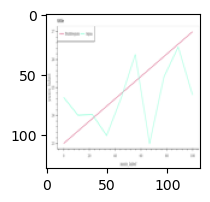

In [8]:

plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [9]:

image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]


label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])

y_train
y_train.shape
y_test.shape

(50,)

In [10]:


def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])

    plt.xlabel(image_classes[y[index]])

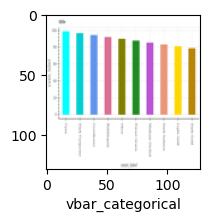

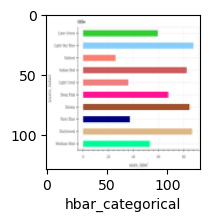

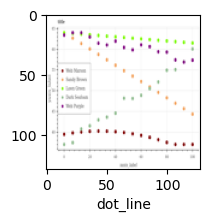

In [11]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,999)

In [12]:


x_train=x_train /255
x_test=x_train /255

In [13]:
x_test.shape

(1000, 128, 128, 3)

In [14]:

y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [15]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [16]:

model = Sequential([
    Flatten(input_shape=(128,128,3)), 
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 25s 715ms/step - loss: 6.4992 - accuracy: 0.2340
Epoch 2/10
32/32 [==============================] - 23s 733ms/step - loss: 1.6275 - accuracy: 0.2160
Epoch 3/10
32/32 [==============================] - 23s 733ms/step - loss: 1.5943 - accuracy: 0.2660
Epoch 4/10
32/32 [==============================] - 25s 775ms/step - loss: 1.5934 - accuracy: 0.2480
Epoch 5/10
32/32 [==============================] - 26s 817ms/step - loss: 1.6051 - accuracy: 0.2300
Epoch 6/10
32/32 [==============================] - 26s 819ms/step - loss: 1.5911 - accuracy: 0.2430
Epoch 7/10
32/32 [==============================] - 26s 825ms/step - loss: 1.5638 - accuracy: 0.2740
Epoch 8/10
32/32 [==============================] - 27s 841ms/step - loss: 1.5469 - accuracy: 0.2660
Epoch 9/10
32/32 [==============================] - 24s 741ms/step - loss: 1.6188 - accuracy: 0.1890
Epoch 10/10
32/32 [==============================] - 25s 781ms/step - loss: 1.6107 - accura

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [18]:
model.evaluate(x_test,y_test)


7/7 [==============================] - 1s 150ms/step - loss: 1.6083 - accuracy: 0.2450


[1.608312964439392, 0.24500000476837158]

In [19]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]


7/7 [==============================] - 1s 148ms/step


In [20]:
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape) 

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 9s 9s/step - loss: 1.6489 - accuracy: 0.1950 - val_loss: 1.9079 - val_accuracy: 0.1900
Epoch 2/50
1/1 [==============================] - 6s 6s/step - loss: 1.8403 - accuracy: 0.2025 - val_loss: 1.6438 - val_accuracy: 0.2400
Epoch 3/50
1/1 [==============================] - 6s 6s/step - loss: 1.6629 - accuracy: 0.1900 - val_loss: 1.6082 - val_accuracy: 0.2350
Epoch 4/50
1/1 [==============================] - 6s 6s/step - loss: 1.6223 - accuracy: 0.2037 - val_loss: 1.6028 - val_accuracy: 0.2300
Epoch 5/50
1/1 [==============================] - 6s 6s/step - loss: 1.5983 - accuracy: 0.2350 - val_loss: 1.5845 - val_accuracy: 0.2100
Epoch 6/50
1/1 [==============================] - 6s 6s/step - loss: 1.5700 - accuracy: 0.2562 - val_loss: 1.5656 - val_accuracy: 0.3000
Epoch 7/50
1/1 [==============================] - 6s 6s/step - loss: 1.5488 - accuracy: 0.3638 - val_loss: 1.5325 - val_accuracy: 0.3050
Epoch 8/50
1/1 [=========================

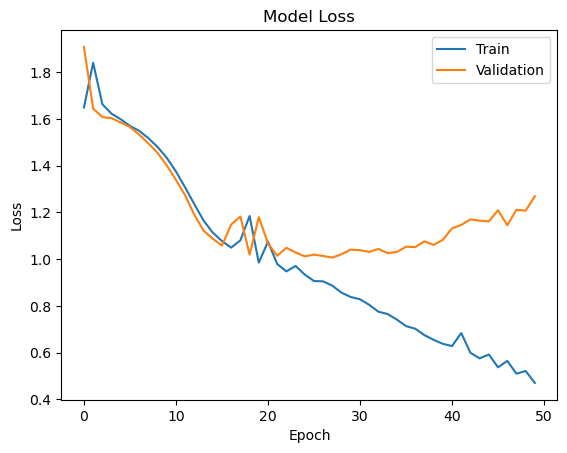

In [21]:
cnn_model = Sequential([
    Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [22]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 72ms/step - loss: 1.2693 - accuracy: 0.6000


[1.269252061843872, 0.6000000238418579]

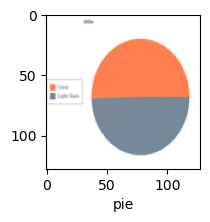

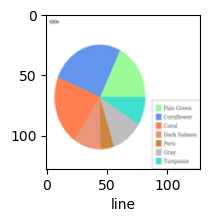

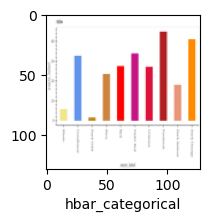

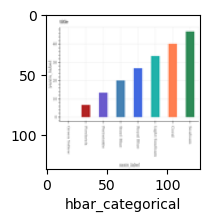

In [23]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [24]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 1s 81ms/step


array([[2.3435222e-01, 5.0415486e-01, 1.6955002e-01, 8.6595528e-03,
        8.3283275e-02],
       [2.6971149e-01, 2.1437112e-02, 2.3291515e-05, 4.0464010e-04,
        7.0842344e-01],
       [1.7000820e-01, 3.9459821e-03, 7.0979696e-04, 4.3658380e-04,
        8.2489944e-01],
       [7.3714930e-01, 1.8705672e-04, 1.7616148e-04, 3.3559180e-03,
        2.5913158e-01],
       [5.7193995e-01, 1.5665317e-01, 2.2921179e-01, 5.3619649e-03,
        3.6833201e-02]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[1, 4, 4, 0, 0]

In [26]:
y_test[:5]

array([0, 4, 4, 4, 0])

'dot_line'

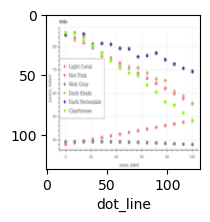

In [27]:


image_sample(x_test,y_test,15) 
image_classes[y_classes[15]] 

In [28]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.53      0.43      0.48        37
           1       0.65      0.84      0.73        44
           2       0.70      0.44      0.54        48
           3       0.42      0.52      0.47        33
           4       0.67      0.76      0.72        38

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.59       200
weighted avg       0.61      0.60      0.59       200



In [29]:
 
conf_mat = confusion_matrix(y_test, y_classes)

print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[16 11  0  4  6]
 [ 3 37  0  1  3]
 [ 6  4 21 17  0]
 [ 0  4  7 17  5]
 [ 5  1  2  1 29]]


Text(95.72222222222221, 0.5, 'Actual')

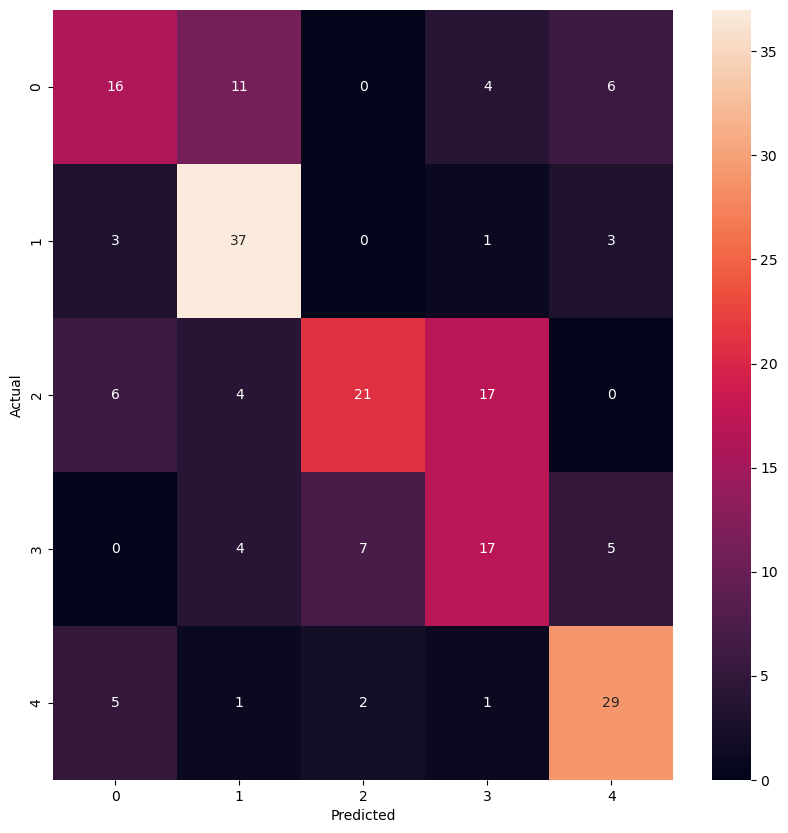

In [30]:

import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [31]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator


vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

58889256/58889256 [==============================] - 22s 0us/step


In [32]:

for layer in vgg16_model.layers:
    layer.trainable = False

In [33]:
from keras.optimizers import Adam

x = vgg16_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = Dropout(0.5)(x)

predictions = Dense(1, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [34]:
pt_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

In [35]:
pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [36]:
 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
train_data_dir = "C:\\Users\\shiva\\Downloads\\charts\\charts\\train_val"
val_data_dir = "C:\\Users\\shiva\\Downloads\\charts\\charts\\train_val"

test_dir = "C:\\Users\\shiva\\Downloads\\charts\\charts\\test"

In [41]:
train_generator =  train_datagen.flow(
    x_train, y_train, 
    batch_size=16, 
   )
 
val_generator = val_datagen.flow(
    x_test, y_test,
    batch_size=16, 
    )
    

In [42]:
os.listdir(train_data_dir)

['0.png',
 '1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '17

In [43]:

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

history = pt_model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[es])

Epoch 1/10
50/50 [==============================] - 90s 2s/step - loss: -1.5057 - accuracy: 0.1950 - val_loss: -3.3424 - val_accuracy: 0.2200
Epoch 2/10
50/50 [==============================] - 89s 2s/step - loss: -5.2046 - accuracy: 0.1950 - val_loss: -6.4332 - val_accuracy: 0.2200
Epoch 3/10
50/50 [==============================] - 93s 2s/step - loss: -8.1005 - accuracy: 0.1950 - val_loss: -8.9710 - val_accuracy: 0.2200
Epoch 4/10
50/50 [==============================] - 93s 2s/step - loss: -10.7419 - accuracy: 0.1950 - val_loss: -11.2536 - val_accuracy: 0.2200
Epoch 5/10
50/50 [==============================] - 96s 2s/step - loss: -13.0609 - accuracy: 0.1950 - val_loss: -13.5579 - val_accuracy: 0.2200
Epoch 6/10
50/50 [==============================] - 101s 2s/step - loss: -15.2559 - accuracy: 0.1950 - val_loss: -15.7868 - val_accuracy: 0.2200
Epoch 7/10
50/50 [==============================] - 96s 2s/step - loss: -18.0136 - accuracy: 0.1950 - val_loss: -18.0987 - val_accuracy: 0.22